In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

In [2]:
s = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/WT')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


In [3]:
for i in range(len(s.structures)):
    s.structures[i] = s.structures[i][:1000]

In [4]:
ijs, d_ijs, err = s.ij_from_contacts()

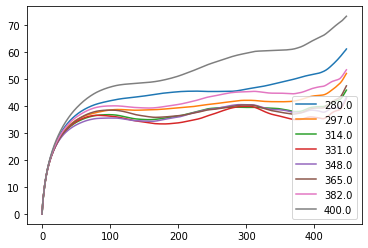

In [5]:
for t in range(len(s.temperatures)):
    plt.plot(ijs, d_ijs[t,:], label=s.temperatures[t])
plt.legend()

In [ ]:
a = md.load_pdb('/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/WT/topo.pdb')

red = a.atom_slice([0, 1])
red.xyz=[[[-10,0,0],[10,0,0]]]
red.unitcell_lengths = [[25, 25, 25]]
print(red.unitcell_lengths)

pairs = list(itertools.product(range(red.n_atoms - 1), range(1, red.n_atoms)))
md.compute_distances(red, pairs, periodic=True)